Load data from http://media.wiley.com/product_ancillary/6X/11186614/DOWNLOAD/ch06.zip, RetailMart.xlsx

In [1]:
# code written in py_3.0

import pandas as pd
import numpy as np

Load customer account data - i.e., past product sales data

In [2]:
# find path to your RetailMart.xlsx
file_path = 'data/ch06/RetailMart.xlsx'
df_accounts = pd.read_excel(file_path, sheet_name='Training Data')
df_accounts.head()

C:\Users\elror\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Unnamed: 17,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,NaN,1


In [3]:
df_accounts = df_accounts.drop('Unnamed: 17', axis=1) # drop empty col
df_accounts.rename(columns={'PREGNANT':'Pregnant', 'Home/Apt/ PO Box':'Residency'}, inplace=True)
df_accounts.head()

,Implied Gender,Residency,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Pregnant
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [4]:
#df_accounts.columns = [x.strip().replace(' ', '_') for x in df_accounts.columns] # python does not like spaces in var names
df_accounts = df_accounts.rename(columns=lambda x: x.strip().replace(' ', '_'))
df_accounts.head()

,Implied_Gender,Residency,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Pregnant
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


We need to categorise the 'Pregnant' column so that it can only take on one of two (in this case) possabilities. Here 1 = pregnant, and 0 = not pregnant

In [5]:
df_accounts['Pregnant'].unique()

array([1, 0], dtype=int64)

In [6]:
#타입을 바꾸는 건데, asssign 구문은 마치 값을 넣는 거 같네.. 
df_accounts['Pregnant'] = df_accounts['Pregnant'].astype(pd.CategoricalDtype(ordered=True))

#그냥 공부하는 차원에서 category에 order를 줘서 해봤는데
#아래와 같이 order 없는 category 타입으로 재차 바꿀 수도 있다.
df_accounts['Pregnant'] = df_accounts['Pregnant'].astype('category')

order를 주냐 안주냐로 인해 fit, predict, ROC 등의 결과에 큰 차이가 생기는 거 같지는 않다.
그렇다고 linear regression에서 target value type으로 쓸 수 있는 것도 아니고..
다만, 마치 numeric data처럼 크다, 작다와 같은 비교 연산을 할 수 있는 건 있다.

예시코드

df = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie', 'Dave'],
    'grade': pd.Categorical(['A', 'B', 'C', 'D'], ordered=True)
})

if df.loc[1, 'grade'] > df.loc[2, 'grade']:
    print("Bob has a higher grade than Charlie")
else:
    print("Charlie has a higher grade than Bob")

Following Greg Lamp over at the Yhat Blog (see [here](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html)), we need to 'dummify' (i.e., separate out) the catagorical variables: gender and residency

In [7]:
df_accounts['Pregnant'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [8]:
# dummify gender var
dummy_gender = pd.get_dummies(df_accounts['Implied_Gender'], prefix='Gender')
print(dummy_gender.head())

   Gender_F  Gender_M  Gender_U
0         0         1         0
1         0         1         0
2         0         1         0
3         0         0         1
4         1         0         0


In [9]:
# dummify residency var
dummy_resident = pd.get_dummies(df_accounts['Residency'], prefix='Resident')
print(dummy_resident.head())

   Resident_A  Resident_H  Resident_P
0           1           0           0
1           0           1           0
2           0           1           0
3           0           1           0
4           1           0           0


In [10]:
#['Implied_Gender', 'Residency']를 drop하지 않으면? logistic회귀분석 로직 내부에서 오류를 뱉는다.
#이 변수들의 타입이 numeric이 아니기 때문이다.
data = pd.concat([dummy_gender[['Gender_M', 'Gender_U']], dummy_resident[['Resident_H', 'Resident_P']], df_accounts.drop(columns=['Implied_Gender', 'Residency'])], axis=1)
data.insert(0, 'Intercept', 1.0) # manually add the intercept
data.head()

,Intercept,Gender_M,Gender_U,Resident_H,Resident_P,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,...,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Pregnant
0,1.0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Intercept               1000 non-null   float64 
 1   Gender_M                1000 non-null   uint8   
 2   Gender_U                1000 non-null   uint8   
 3   Resident_H              1000 non-null   uint8   
 4   Resident_P              1000 non-null   uint8   
 5   Pregnancy_Test          1000 non-null   int64   
 6   Birth_Control           1000 non-null   int64   
 7   Feminine_Hygiene        1000 non-null   int64   
 8   Folic_Acid              1000 non-null   int64   
 9   Prenatal_Vitamins       1000 non-null   int64   
 10  Prenatal_Yoga           1000 non-null   int64   
 11  Body_Pillow             1000 non-null   int64   
 12  Ginger_Ale              1000 non-null   int64   
 13  Sea_Bands               1000 non-null   int64   
 14  Stopped_buying_ciggies  1

In [12]:
# define X and y
train_cols = data.columns[1:-1] #맨 마지막의 Pregnent열은 빼줘야 함.
#train_cols = data.columns[:-1] #근데 Intercept는 빼주나 안빼주나 결과가 같은 듯..
X = data[train_cols]
y = data['Pregnant']

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train(fitb) a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e9)
model.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [13]:
model.coef_

array([[-0.44060974,  0.12000658, -0.23491304,  0.04625762,  1.97742423,
        -2.05471082, -1.91548338,  4.12419879,  2.29719934,  2.38159435,
         0.66491651,  1.62967566,  1.21777026,  1.17575076, -1.36902214,
         1.96814012,  1.48205619, -1.30345198,  1.74384894]])

In [14]:
# make predictions for testing set
y_pred_class = model.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.88


In [15]:
y_pred_class

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

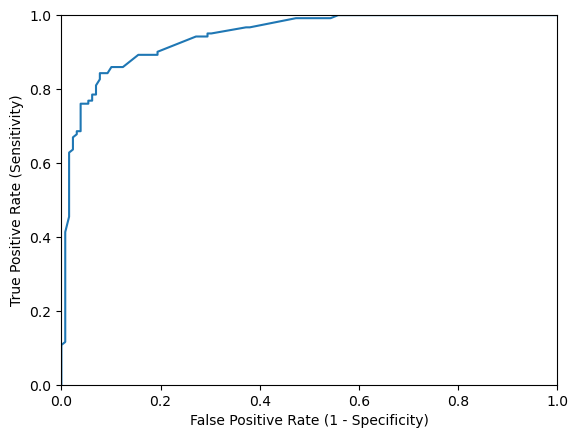

In [16]:
# predict probability of survival
y_pred_prob = model.predict_proba(X_test)[:, 1]

# get values for ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [17]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9439425972195529


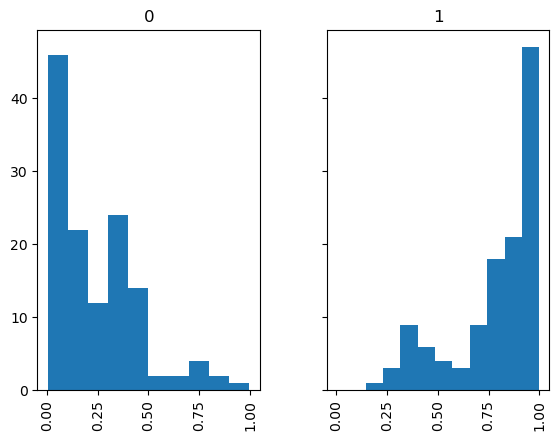

In [18]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)
plt.show()

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

Random forest feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
clf.fit(data[train_cols], df_accounts['Pregnant'])

In [ ]:
# sort the features by importance
sorted_idx = clf.feature_importances_
df_features = pd.DataFrame({"Feature": train_cols})
df_features['Importance'] = sorted_idx

df_features = df_features.sort_values(by=['Importance'], ascending=[True]) # sort my most important feature
ax = df_features.plot(kind='barh', title ="Classification Feature Importance", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Importance", fontsize=12)
ax.set_yticklabels(df_features['Feature'])
plt.show()

We can see that the purchase of Folic Acid is a much better predictor of a customer pregnancy, surprisingly more so than an intrest in Prenatal Yoga (presumably more expectant mother use folic acid than take up yoga)---this information could be used to accurately target the advertisment of baby products